# Week 1
By Markus Minkkinen

### Executive summary

In this file, the correlation between sales and temperature, sales, wind were examined. The data was cleaned and examined. Data was fit into linear regression and multi regression parameters were examined. 

In conclusion, there is correlation between the sales and temperature and weekdads. There is also correlation between less sales of ice cream in Mondays comperared to average. However, there is no correlation between the windspeed and deliveries. 


## 1. 

In [42]:
# Import the pandas and numpy libraries for storing and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [4]:
# Import the data and drop observations table
sales=pd.read_csv('AaltoIceCream_sales_data24.csv', sep=',', decimal='.')

sales.drop(columns=['Observation'], inplace=True)



,Weekday,t_celsius,wind_ms,Sales_kg
0,1,26,4.3,117
1,2,24,4.9,194
2,3,21,4.8,85
3,4,19,3.3,91
4,5,22,5.9,217


## 2.

In [ ]:
sales.head()

In [5]:
sales.describe()

,Weekday,t_celsius,wind_ms,Sales_kg
count,200.000000,200.000000,200.000000,200.000000
mean,3.970000,18.350000,5.408000,154.730000
std,2.002285,5.202193,2.328076,56.252367
min,1.000000,10.000000,1.600000,15.000000
25%,2.000000,14.000000,3.600000,117.000000
50%,4.000000,18.000000,4.800000,148.000000
75%,6.000000,22.000000,6.900000,194.750000
max,7.000000,27.000000,13.800000,294.000000


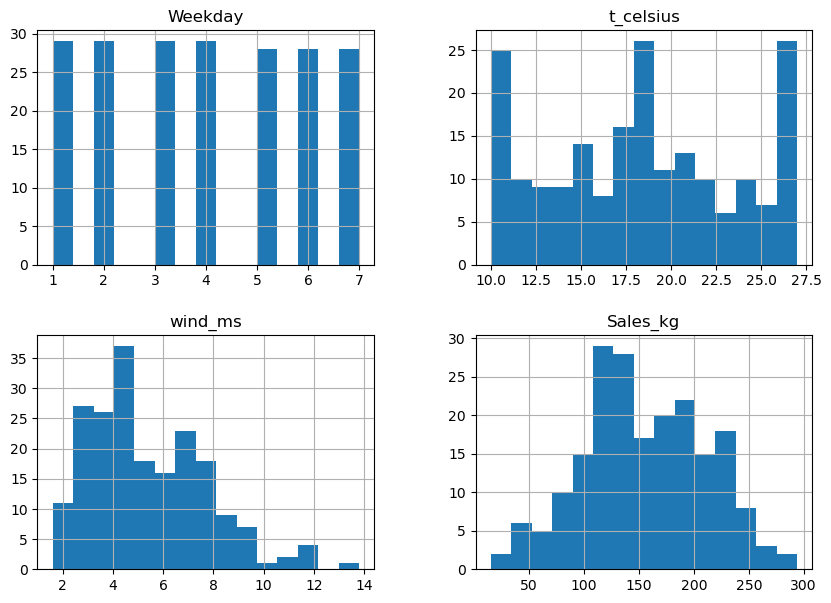

In [21]:
# Histograms showing how often does the variable show 

sales.hist(bins=15, figsize=(10, 7))
plt.show()

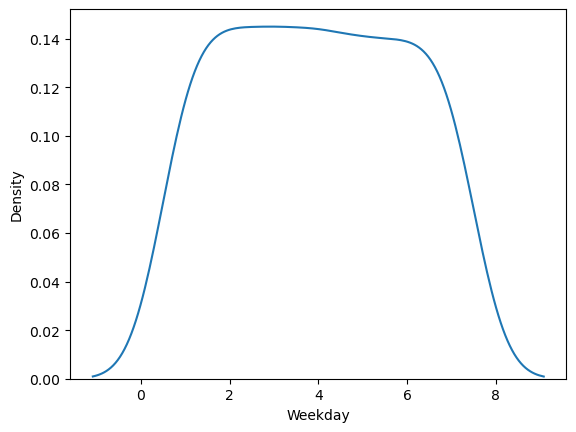

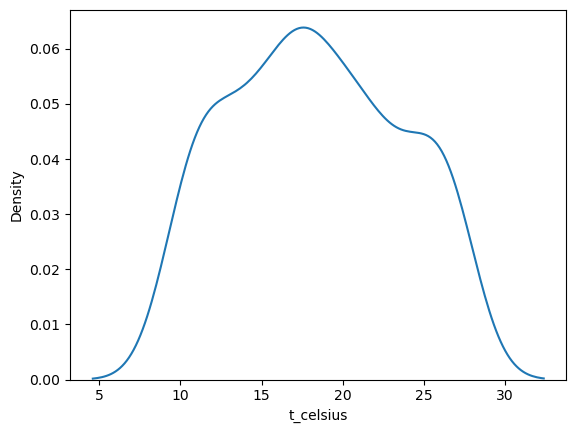

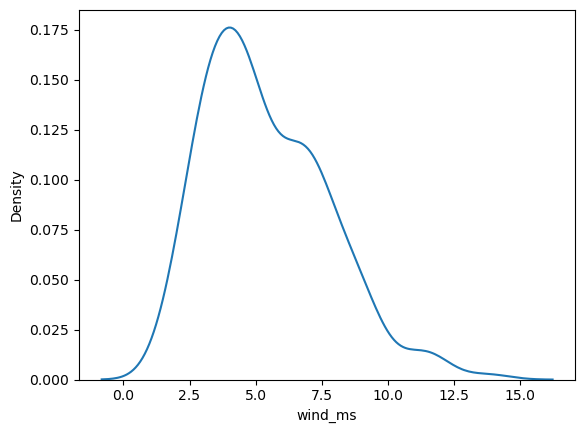

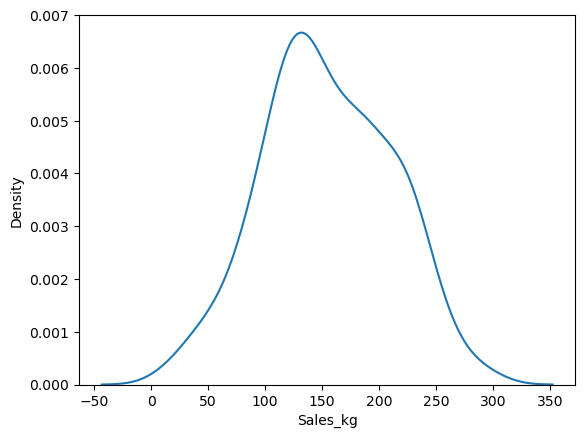

In [30]:
# Density plots of Sales_kg against predictor variables
for column in sales.columns:
    sns.kdeplot(sales[column])
    plt.show()

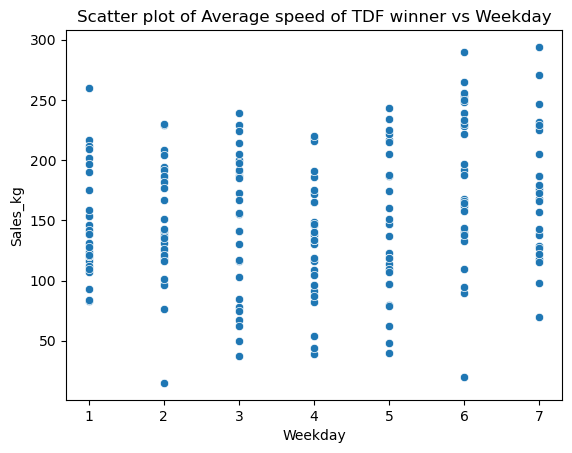

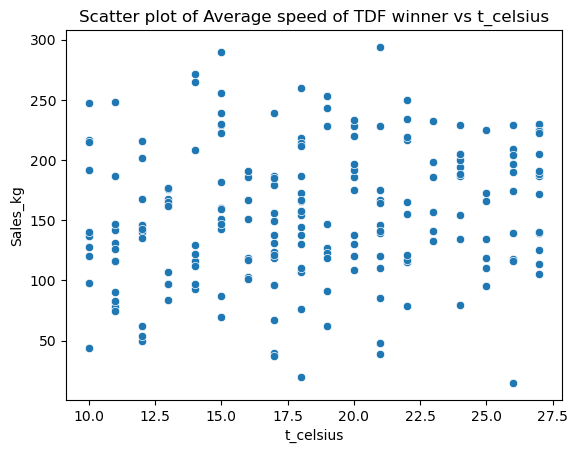

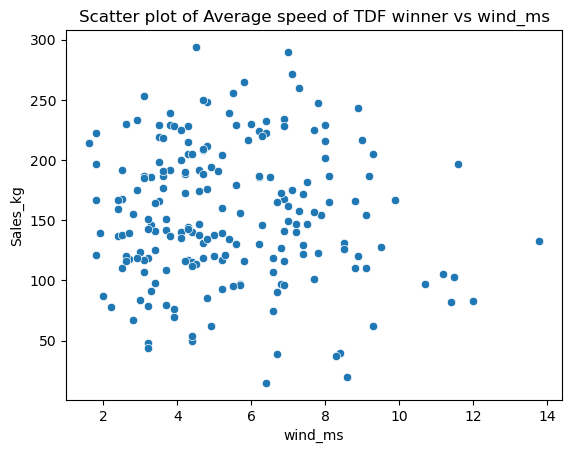

In [11]:
# Scatter plots of Sales_kg against predictor variables
for column in ['Weekday','t_celsius','wind_ms']:
    sns.scatterplot(data=sales, x=column, y='Sales_kg')
    plt.title(f'Scatter plot of Average speed of TDF winner vs {column}')
    plt.show()

## 3. 

In [32]:
# Fit the regression into model 



X = sales['t_celsius']
X = sm.add_constant(X)  
y = sales['Sales_kg']

model_speed_distance = sm.OLS(y, X).fit()
print(model_speed_distance.summary())

                            OLS Regression Results                            
Dep. Variable:               Sales_kg   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     5.557
Date:                Tue, 27 Feb 2024   Prob (F-statistic):             0.0194
Time:                        20:25:08   Log-Likelihood:                -1086.5
No. Observations:                 200   AIC:                             2177.
Df Residuals:                     198   BIC:                             2184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.9453     14.453      8.437      0.0

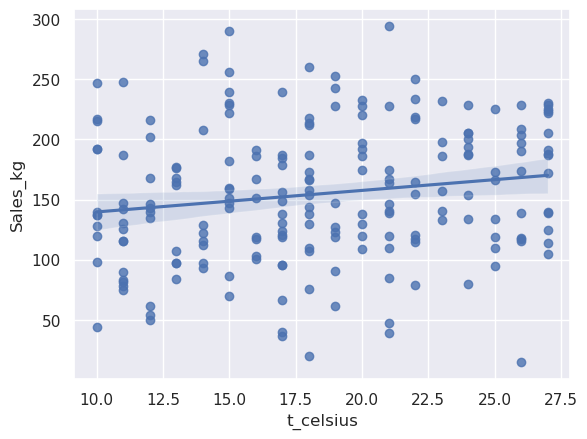

In [41]:
# plot the regression and line into scatterplot 

sns.set_theme()

sns.regplot(data=sales, x="t_celsius", y="Sales_kg")


regression_equation = ''

plt.text(0.05, 0.95, regression_equation, transform=plt.gca().transAxes, ha='left', va='top')

plt.show()

Thre seems to be small correlation between the tempereature increase and and the increase of sales. 


## 4.

### Hypothesis 

The hypotesis is that the icecream sales are lower in Mondays. This is examined by looking the p values.

In [51]:

#hypothesis, icecream sales are lower in Mondays 

# filter mondays and less sales than med

sales['less_S'] = ((sales['Sales_kg'] < 154) & (sales['Weekday'] == 1)).astype(int)

# T-test


less_sales = sales[sales['less_S'] == 1]['Sales_kg']
more_sales = sales[sales['less_S'] == 0]['Sales_kg']

t_stat, p_value = stats.ttest_ind(less_sales, more_sales)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -2.922714957304695, P-value: 0.0038736571692914185


p-value less than 0.05 means that there is statistical significance on the values meaning that the hyphotesis holds. This means that there is less ice cream sales in Mondays.

In [53]:
print(sales.head())

   Weekday  t_celsius  wind_ms  Sales_kg  less_S
0        1         26      4.3       117       1
1        2         24      4.9       194       0
2        3         21      4.8        85       0
3        4         19      3.3        91       0
4        5         22      5.9       217       0


## 5. 

In [56]:
# Simple linear regression to investigate the relationship between total lenght of the competition and average speed
X = sales[['t_celsius', 'wind_ms', 'Weekday']] #Number of stages
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = sales['Sales_kg']

model_sales = sm.OLS(y, X).fit()
print(model_sales.summary())

                            OLS Regression Results                            
Dep. Variable:               Sales_kg   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     4.831
Date:                Tue, 27 Feb 2024   Prob (F-statistic):            0.00288
Time:                        21:23:27   Log-Likelihood:                -1082.1
No. Observations:                 200   AIC:                             2172.
Df Residuals:                     196   BIC:                             2185.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.8255     18.195      6.036      0.0

Based on the p values of the model, the temperature and weekday correlete with the sales. They both have at least p value of 0.05 which indicates the correlation. However, windspeed doesn't really correlate with the sales. 